[1] Processed: a.jpg
  → Plant height: 589 pixels


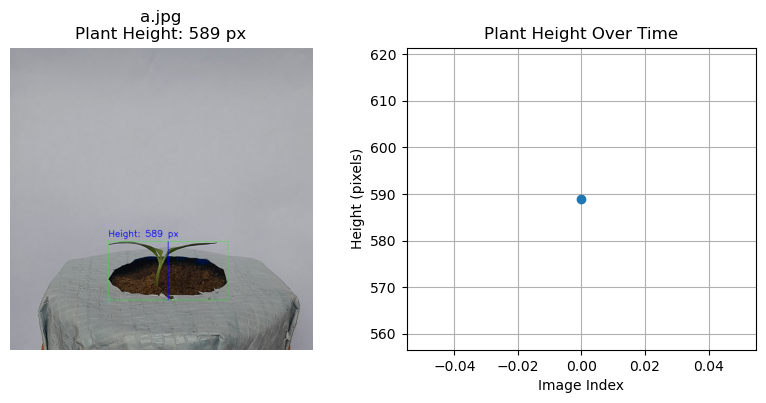

[2] Processed: b.jpg
  → Plant height: 599 pixels


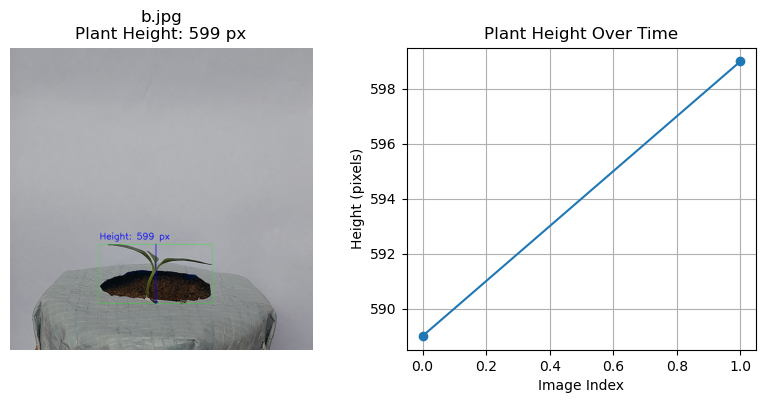

[3] Processed: c.jpg
  → Plant height: 653 pixels


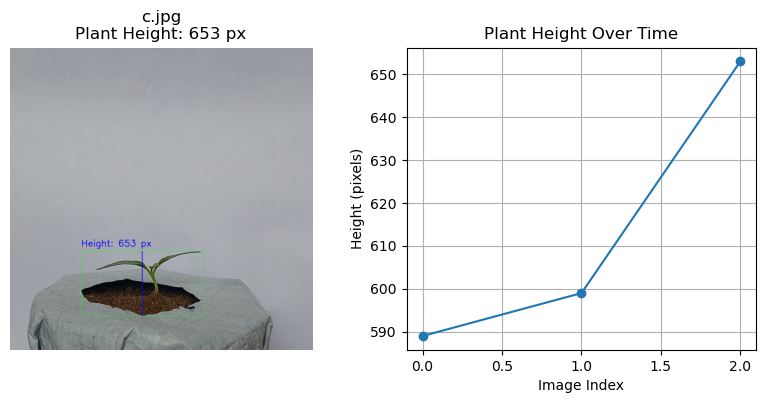

[4] Processed: d.jpg
  → Plant height: 713 pixels


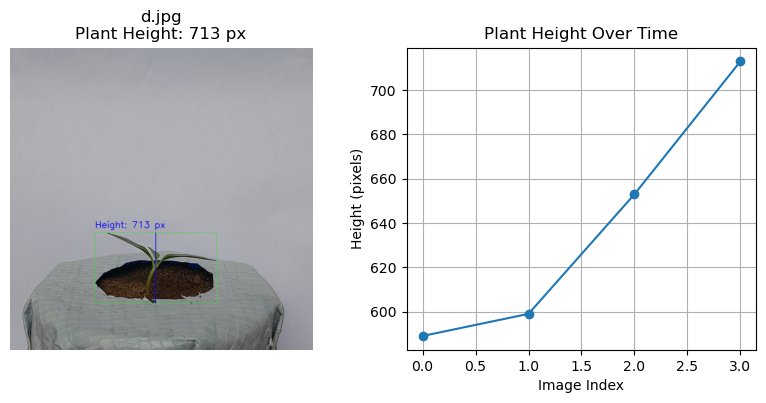

[5] Processed: e.jpg
  → Plant height: 756 pixels


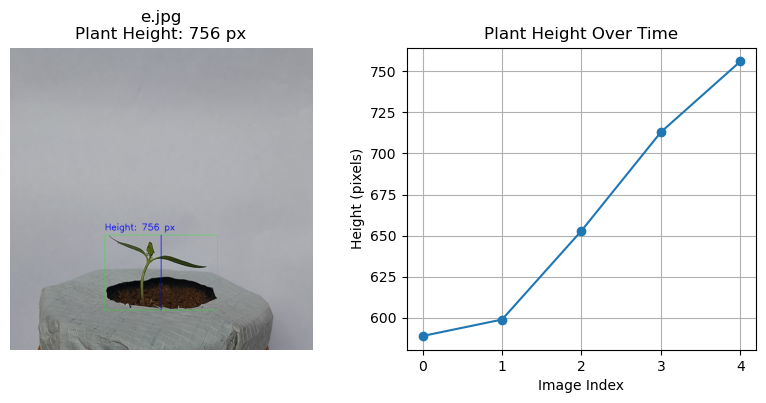

[6] Processed: f.jpg
  → Plant height: 773 pixels


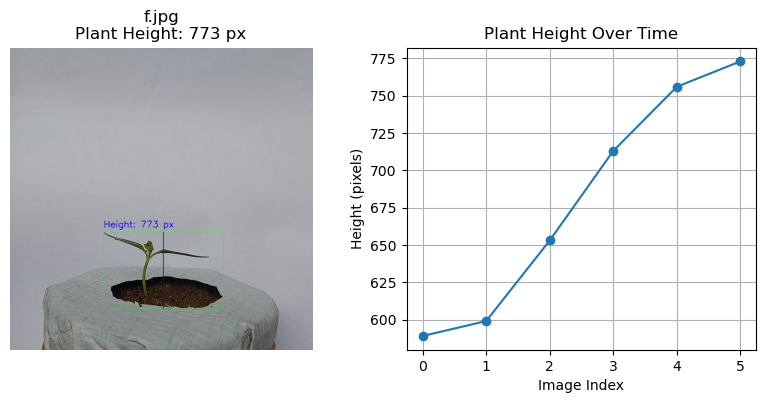

[7] Processed: g.jpg
  → Plant height: 748 pixels


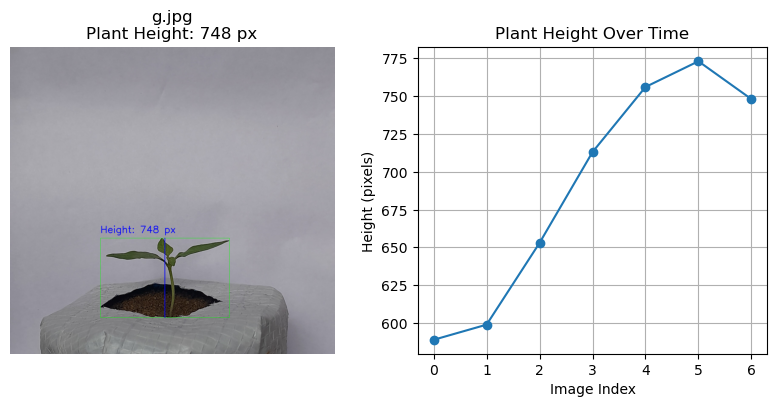

[8] Processed: h.jpg
  → Plant height: 755 pixels


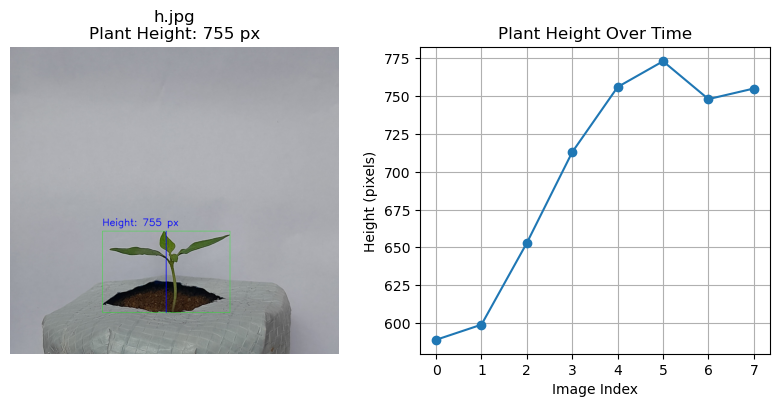

[9] Processed: i.jpg
  → Plant height: 973 pixels


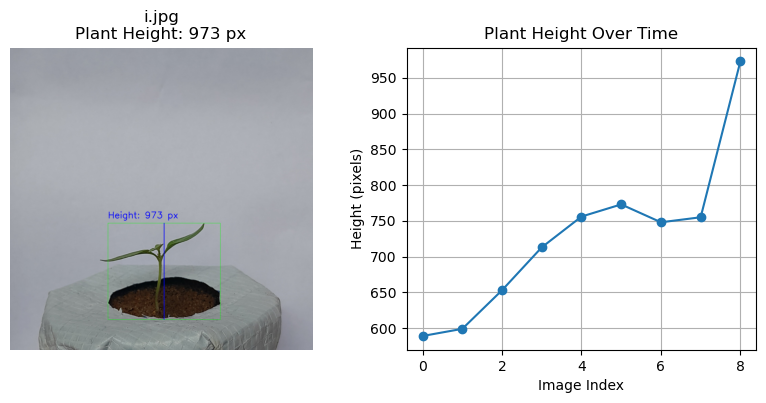

[10] Processed: j.jpg
  → Plant height: 965 pixels


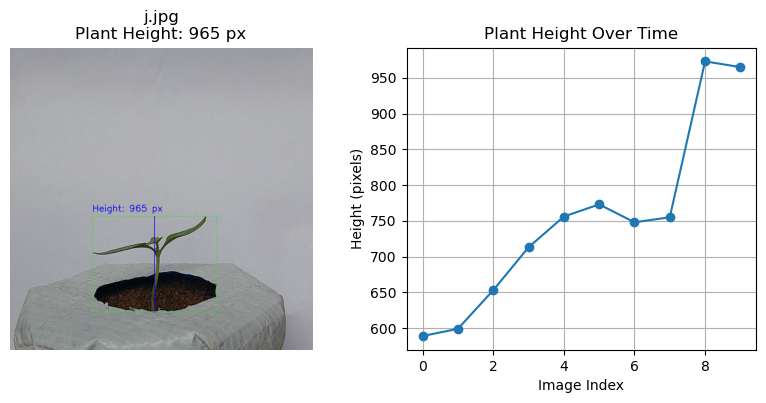

[11] Processed: k.jpg
  → Plant height: 952 pixels


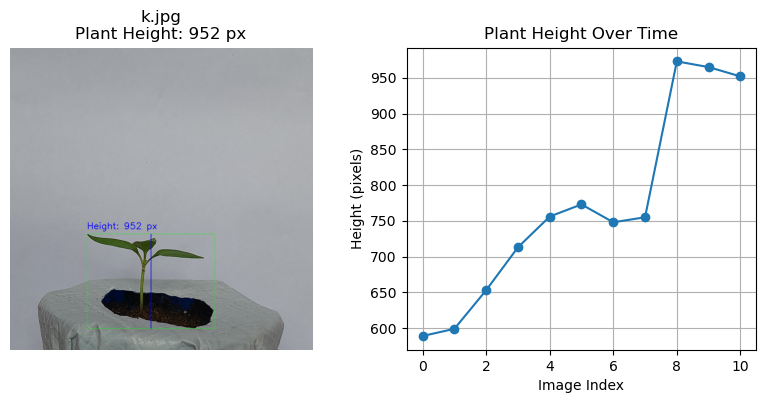

[12] Processed: l.jpg
  → Plant height: 980 pixels


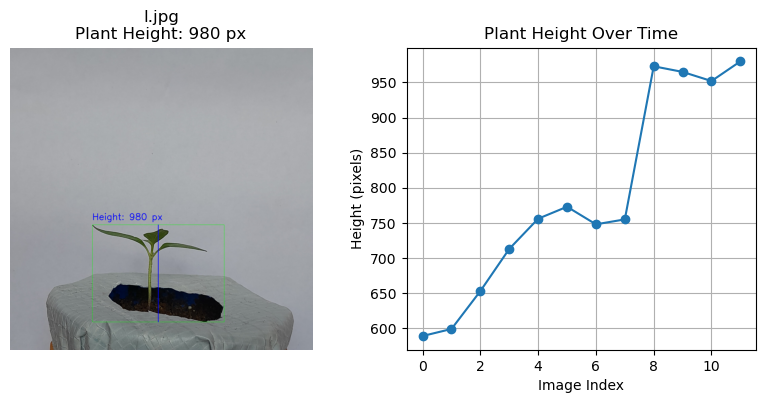

[13] Processed: m.jpg
  → Plant height: 986 pixels


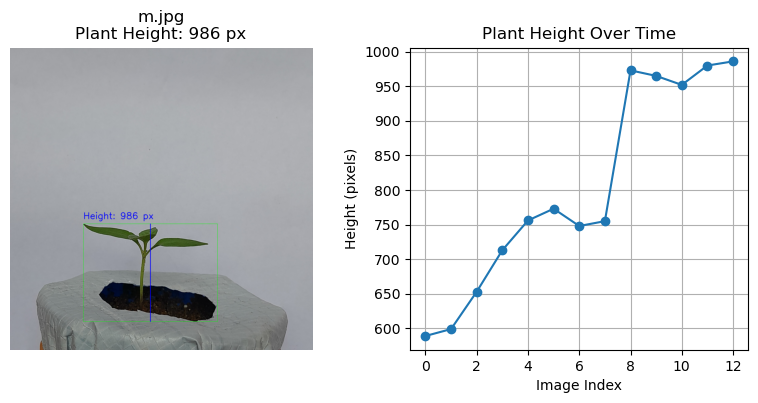

[14] Processed: n.jpg
  → Plant height: 1000 pixels


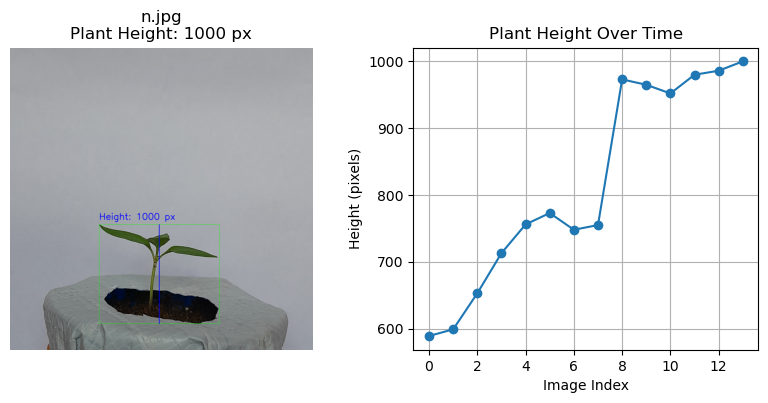

[15] Processed: o.jpg
  → Plant height: 1005 pixels


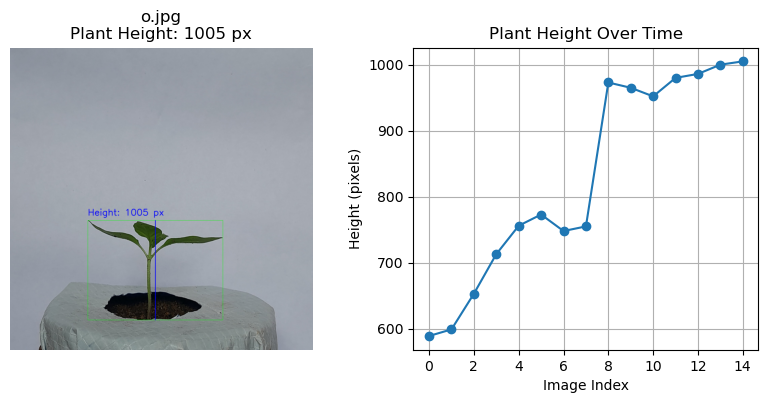

[16] Processed: p.jpg
  → Plant height: 1092 pixels


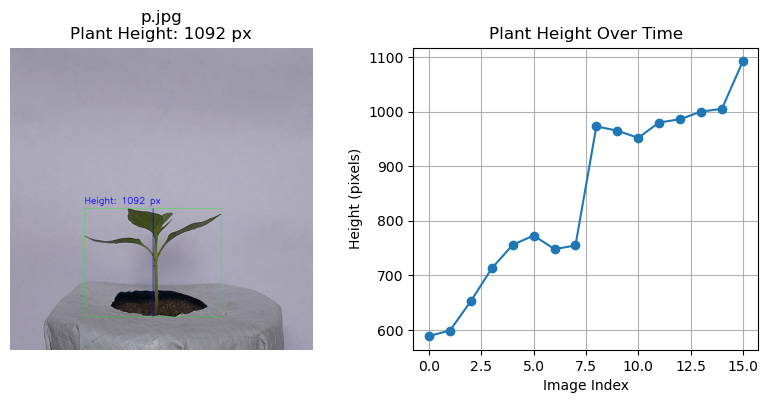

[17] Processed: q.jpg
  → Plant height: 1125 pixels


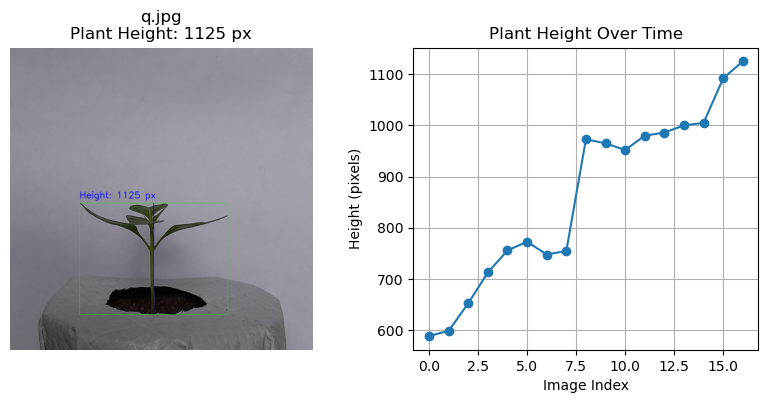

[18] Processed: r.jpg
  → Plant height: 1133 pixels


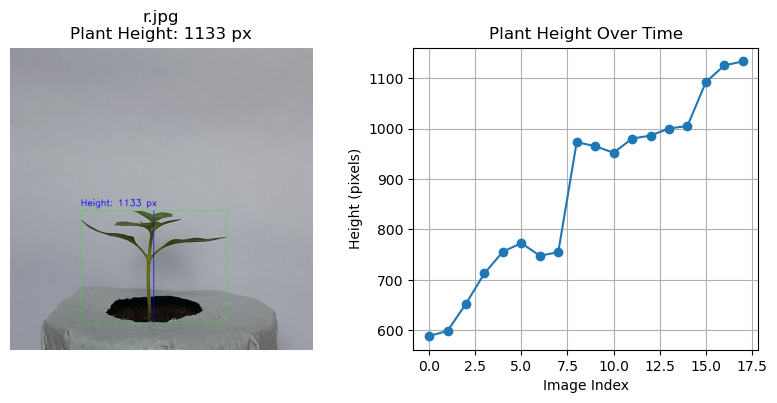

[19] Processed: s.jpg
  → Plant height: 1137 pixels


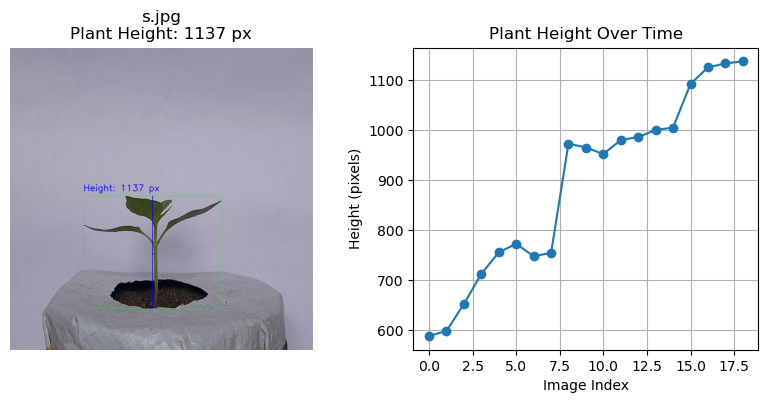

[20] Processed: t.jpg
  → Plant height: 1162 pixels


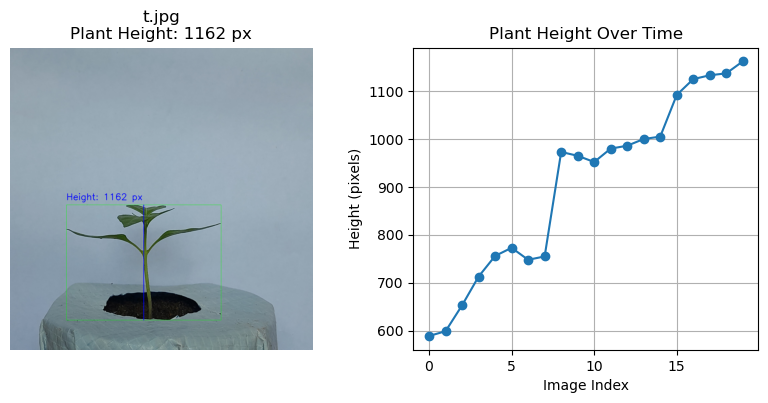

[21] Processed: u.jpg
  → Plant height: 1262 pixels


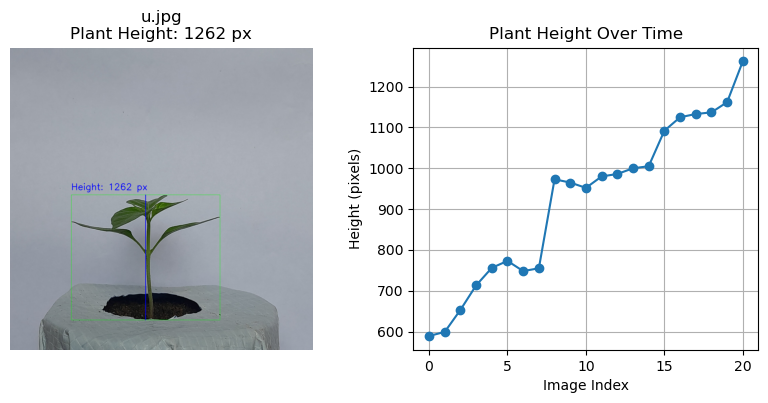

[22] Processed: v.jpg
  → Plant height: 1264 pixels


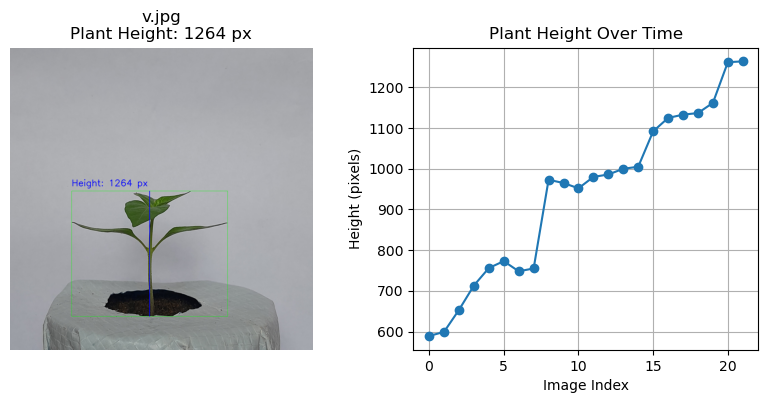

[23] Processed: w.jpg
  → Plant height: 1295 pixels


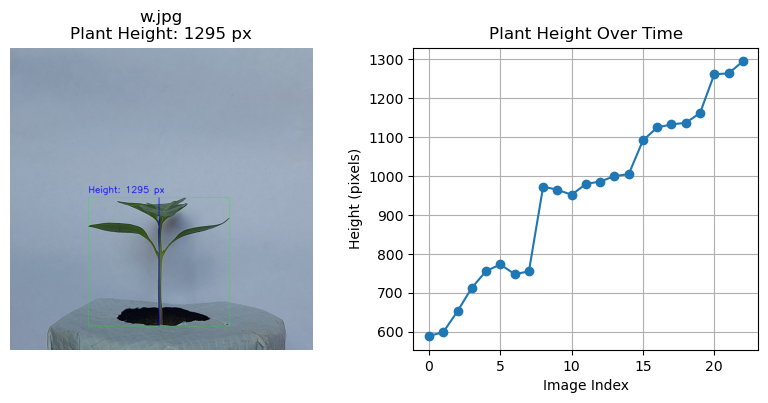

[24] Processed: x.jpg
  → Plant height: 1389 pixels


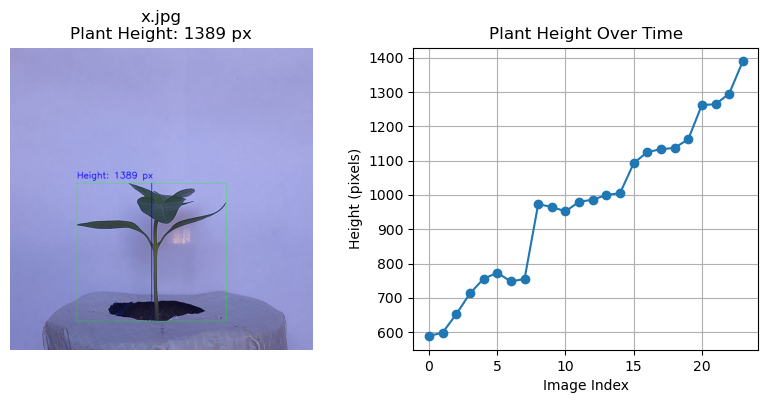

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_folder = "side_view_pics"  # Folder containing side view images
valid_extensions = ('.jpg', '.jpeg', '.png')  # Supported image formats

plant_heights = []
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_extensions)]

for idx, filename in enumerate(sorted(image_files), 1):
    image_path = os.path.join(image_folder, filename)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {filename}")
        continue

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        plant_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(plant_contour)

        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.line(image, (x + w // 2, y), (x + w // 2, y + h), (255, 0, 0), 6)

        height = h
        plant_heights.append(height)

        cv2.putText(image, f'Height: {height} px', (x, y - 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 6)

        print(f"[{idx}] Processed: {filename}")
        print(f"  → Plant height: {height} pixels")

        # Convert BGR image to RGB for displaying in Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show image and graph together
        fig, axs = plt.subplots(1, 2, figsize=(8, 4))

        # Plant image with bounding box and height line
        axs[0].imshow(image_rgb)
        axs[0].set_title(f"{filename}\nPlant Height: {height} px")
        axs[0].axis('off')

        # Height progression graph
        axs[1].plot(plant_heights, marker='o', linestyle='-')
        axs[1].set_title("Plant Height Over Time")
        axs[1].set_xlabel("Image Index")
        axs[1].set_ylabel("Height (pixels)")
        axs[1].grid(True)

        plt.tight_layout()
        plt.show()

    else:
        print(f"[{idx}] No plant contour detected in {filename}")
        continue
